In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#### To read image from disk, we use
####  cv2.imread function, in below method

In [3]:
img = cv2.imread('image.png',-1)

### Instead of these three flags, you can simply pass 
integers 1, 0 or -1 respectively.

0 = greyscale

1 = colorimage

-1 = unchanged original

In [3]:
# Creating GUI window to display an imag on screen
# first param is window title(str), second imag array

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindow()

AttributeError: module 'cv2.cv2' has no attribute 'destroyAllWindow'

In [ ]:
# To hold the window on screen, we use cv2.waitKey method
# Once it detected the close input, it will release the control
# To the next line
# First Parameter is for holding screen for specified milliseconds
# It should be positive integer. If 0 pass an parameter, then it will
# hold the screen until user close it.

#cv2.waitkey(0) it doesn't work

#### cv2.waitKey() is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc which we will discuss below.

cv2.destroyAllWindows() simply destroys all the windows we created. If you want to destroy any specific window, use the function cv2.destroyWindow() where you pass the exact window name as the argument.

There is a special case where you can already create a window and load image to it later. In that case, you can specify whether window is resizable or not. It is done with the function cv2.namedWindow(). By default, the flag is cv2.WINDOW_AUTOSIZE. But if you specify flag to be cv2.WINDOW_NORMAL, you can resize window. It will be helpful when image is too large in dimension and adding track bar to windows.

In [ ]:
cv2.namedWindow('image',cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
cv2.waitkey(0)
cv2.destroyAllWindows()

In [ ]:
# To Save the image, write an image

cv2.imwrite('imgrey',img)

In [ ]:
#Below program loads an image in grayscale, displays it, save the image if you press ‘s’ and exit, or simply exit without saving if you press ESC key.

img = cv2.imread('image.png',0)
cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF  #If you are using a 64-bit machine, you will have to modify k = cv2.waitKey(0) line as follows : k = cv2.waitKey(0) & 0xFF
if k == 27:  #wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'):   #wait for 's' key to save and exit
    cv2.imwrite('imagegrey.png',img)
    cv2.destroyAllWindow()

###  how to display image with Matplotlib. You can zoom images, save it etc using Matplotlib.

In [ ]:
img = cv2.imread('moonfull.jpg',1)
plt.imshow(img, cmap='gray',interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) #to hide tick values on X and Y axis
plt.show()

Color image loaded by OpenCV is in BGR mode. But Matplotlib displays in RGB mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV.

## Getting Started with Videos
Goal
Learn to read video, display video and save video.

Learn to capture from Camera and display it.

You will learn these functions : 

cv2.VideoCapture()

cv2.VideoWriter()

# Capture Video from Camera

Often, we have to capture live stream with camera. OpenCV provides a very simple interface to this. Let’s capture a video from the camera (I am using the in-built webcam of my laptop), convert it into grayscale video and display it. Just a simple task to get started.

To capture a video, you need to create a VideoCapture object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1). You can select the second camera by passing 1 and so on. After that, you can capture frame-by-frame. But at the end, don’t forget to release the capture.

In [17]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture image frame-by-frame
    ret, frame = cap.read()
    
    #Our operation on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Release the capture
cap.release()
cv2.destroyAllWindows()

cap.read() returns a bool (True/False). If frame is read correctly, it will be True. So you can check end of the video by checking this return value.

Sometimes, cap may not have initialized the capture. In that case, this code shows error. You can check whether it is initialized or not by the method cap.isOpened(). If it is True, OK. Otherwise open it using cap.open().

You can also access some of the features of this video using cap.get(propId) method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video) and full details can be seen here: Property Identifier. Some of these values can be modified using cap.set(propId, value). Value is the new value you want.

For example, I can check the frame width and height by cap.get(3) and cap.get(4). It gives me 640x480 by default. But I want to modify it to 320x240. Just use ret = cap.set(3,320) and ret = cap.set(4,240).



#### It is better to know the size of the image to work with the image processing application. In OpenCV, images are generally stored in the Numpy ndarray. To get the image shape or size, use ndarray.shape to find the dimension of the image. Then, we can use the index position to get the height, width, and number of channels.

In [3]:
pixel = img[100,100]
print(pixel)

[188 212 236 255]


Access pixel values and modify them

Access Image Properties

Setting Region of Image

Splitting and merging images

Change the image color

Accessing and Modifying pixel values

### We can retrieve a pixel value by its row and column coordinates. It returns an array of blue, green, red values of the BGR image. It returns the corresponding intensity for the grayscale image. First, we need to load the BGR image.

In [8]:
import cv2  
import math
# read image  
img = cv2.imread('image.png',1)  
  
# height, width, number of channels in image  
height = img.shape[0]  
width = img.shape[1]  
channels = img.shape[2]  
size1 = img.size  

print('Image Dimension    :',img.shape)  
print('Image Height       :',height)  
print('Image Width        :',width)  
print('Number of Channels :',channels)  
print('Image Size  :',size1)  

Image Dimension    : (207, 220, 3)
Image Height       : 207
Image Width        : 220
Number of Channels : 3
Image Size  : 136620


### Image ROI (Region of Interest)
Sometimes, we need to work with some areas of the image. As we discuss in the previous tutorial face detection is over the entire picture. When a face is obtained, we select only the face region and search for eyes inside it instead of searching the whole image. It enhances accuracy and performance because eyes are always on the face and don't need to search the entire image.

### Splitting and Merging Image channels

An image's BGR channels can be split into their planes when needed. Then, the individual channels can be merged back together from the BGR image again. This can be done by following way:

In [10]:

b,g,r = cv2.split(img)  
img = cv2.merge((b,g,r))  
#or


#b = img[:,:,0]  
# Note: The cv2.split() function is a slow function. Numpy indexing is quit efficient and it should be used if possible.


### Making Borders for Images
OpenCV provides the cv2.copyMakeBorder() function to create a border around the image, something like a photo frame. The syntax of the function is given below.



cv2.copyMakeBorder(src,top,bottom,left,right,border type)  

Parameters:

src - It denotes input image.

top, bottom, left, right - It defines the border width in the number of pixels in the corresponding direction.

borderType - It defines what kind of border to be added. The border can be the following types.

value - Color of border if border type is cv.BORDER_CONSTANT

Consider the following example:

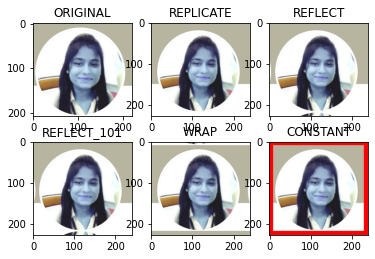

In [14]:
import cv2 as cv
from matplotlib import pyplot as plt  
BLUE = [255,0,0]  
img1 = cv.imread('image.png',1)  
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)  
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)  
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)  
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)  
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)  
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')  
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')  
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')  
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')  
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')  
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')  
plt.show()   

### Change in Image color

### OpenCV cvtColor

The cvtColor is used to convert an image from one color space to another

cv2.cvtColor(src, dst, code) 


Parameters:
src - It is used to input an image: 8-bit unsigned.

dst - It is used to display an image as output. The output image will be same size and depth as input image.

code - color space conversion code.

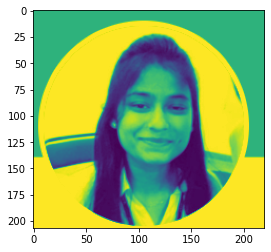

In [7]:

# Using cv2.cvtColor() method   
# Using cv2.COLOR_BGR2GRAY color space for convert BGR image to grayscale  

image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(image)

### OpenCV Resize the image

Sometimes, it is necessary to transform the loaded image. In the image processing, we need to resize the image to perform the particular operation. Images are generally stored in Numpy ndarray(array). The ndarray.shape is used to obtain the dimension of the image. We can get the width, height, and numbers of the channels for each pixel by using the index of the dimension variable.

In [11]:
scale = 60
width = int(img.shape[1]*scale/100)
height = int(img.shape[0]*scale/100)
dim = (width,height)

#resize the image 

resized = cv2.resize(img,dim, interpolation=cv2.INTER_AREA)

print('Resized Dimensions :',resized.shape)

cv2.imshow("Resized image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions : (124, 132, 4)


The resizing of image means changing the dimension of the image, its width or height as well as both. Also the aspect ratio of the original image could be retained by resizing an image. OpenCV provides cv2.resize() function to resize the image. The syntax is given as:

cv2.resize(src, dsize[, dst[, fx[,fy[,interpolation]]])  

### Parameters:
src - source/input image (required).

dsize - desired size for the output image(required)

fx - Scale factor along the horizontal axis.(optional)

fy - Scale factor along the vertical axis.

### Interpolation(optional) - This flag uses following methods:

INTER_NEAREST - A nearest-interpolation INTER_AREA - resampling using pixel area relation. When we attempt to do image zoom, it is similar to the INTER_NEAREST method.

INTER_CUBIC - A bicubic interpolation over 4×4 pixel neighborhood.

INTER_LANCOZS4 - Lanczos interpolation over 8×8 pixel neighborhood.

### There are several ways to resize the image. Below are some examples to perform resize operation:

Retain Aspect Ratio ( height to width ratio of the image is retained)

Downscale(Decrement in the size of the image)

Upscale(Increment in the size of image)

Do not preserve Aspect Ratio

Resize only the width

Resize only the height

Resize the specified width and height

### Retain the aspect ratio

Downscale with resize()

In [9]:
print('Original Dimensions',img.shape)

scale = 60 #downscale value <100
width = int(img.shape[1]*scale/100)
height = int(img.shape[0]*scale/100)
dim = (width,height)

#resize the image 

resized = cv2.resize(img,dim, interpolation=cv2.INTER_AREA)

print('Resized Dimensions :',resized.shape)

cv2.imshow("Resized image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions (207, 220, 4)
Resized Dimensions : (124, 132, 4)



In the above example, the scale_per variable holds the percentage of the image which needs to be scaled. The value<100 is used to downscale the provided image. We will use this scale_per value along with the original image's dimension to calculate the width and height of the output image.

### Upscale with resize()

In [10]:
print('Original Dimensions',img.shape)

scale = 150 #Upscale value >100
width = int(img.shape[1]*scale/100)
height = int(img.shape[0]*scale/100)
dim = (width,height)

#resize the image 

resized = cv2.resize(img,dim, interpolation=cv2.INTER_AREA)

print('Resized Dimensions :',resized.shape)

cv2.imshow("Resized image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions (207, 220, 4)
Resized Dimensions : (310, 330, 4)


### Not retaining the aspect ratio

### Resize only the width

In the below example, we have provided a specific value in pixel for width and the height will remain unaffected.

In [12]:
print('Original Dimensions',img.shape)

width = img.shape[1] #keep original width
height = 440 #increase the height
dim = (width,height)

#resize image
resized = cv2.resize(img,dim,interpolation= cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2.imshow("Resized image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions (207, 220, 4)
Resized Dimensions :  (440, 220, 4)


### Resize the height

In the below example, the scale_per value holds the percentage by which height has to be scaled or we can provide the specific value in pixels.

In [13]:
print('Original Dimensions',img.shape)

width = img.shape[1] #keep original width
height = 200 ##decrease the height
dim = (width,height)

#resize image
resized = cv2.resize(img,dim,interpolation= cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2.imshow("Resized image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions (207, 220, 4)
Resized Dimensions :  (200, 220, 4)


### Resize the specific width and height

We can specify both width and height.

In [14]:
print('Original Dimensions',img.shape)

width = 300 #randomly resized
height = 200 #randomly resized
dim = (width,height)

#resize image
resized = cv2.resize(img,dim,interpolation= cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2.imshow("Resized image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions (207, 220, 4)
Resized Dimensions :  (200, 300, 4)


# Thanks